In [1]:
%config InlineBackend.figure_format = 'retina'
import importlib as imp
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

import cnet
import utils as utl

# Спектр произвольных полей

In [2]:
def cpt_spectra(filepaths, level=None, beta=None):
    """
    Можно либо задать выбор устойчивого уровня указав beta, либо явно задать
    число итераций сглаживания через level, на которых должна считаться критическая сеть.
    """
    if level is None and beta is None:
        raise RuntimeError('You must specify either level or beta value in function cpt_spectra()!')
    
    spectra = []
    for fp in filepaths:
        img = np.loadtxt(fp)
        img = utl.scale_img(img)
        log, components, beta_scales, betas = cnet.cpt_stable_log_ndarr(img, ss_sigma=1.6)
        lap = None
        if level:
            lap = log[level]
        elif beta:
            lap = log[cnet.select_level(beta, betas)]
        minima, maxima = cnet.cpt_keypoints(lap, replace_clusters=True)
        edges = cnet.cpt_criticalnet(lap, minima, maxima)
        spectrum = cnet.cpt_normalized_laplacian_spectrum(cnet.mk_graph(edges))
        spectra.append(spectrum)
    return spectra

## Гауссовские случайные поля

In [3]:
files = []
for i in range(1, 13):
    files.append('data/gauss_univ_fields/gf%d.txt' % i)
# Выбираем 7-устойчивый уровень.
spectra = cpt_spectra(files, beta=7)

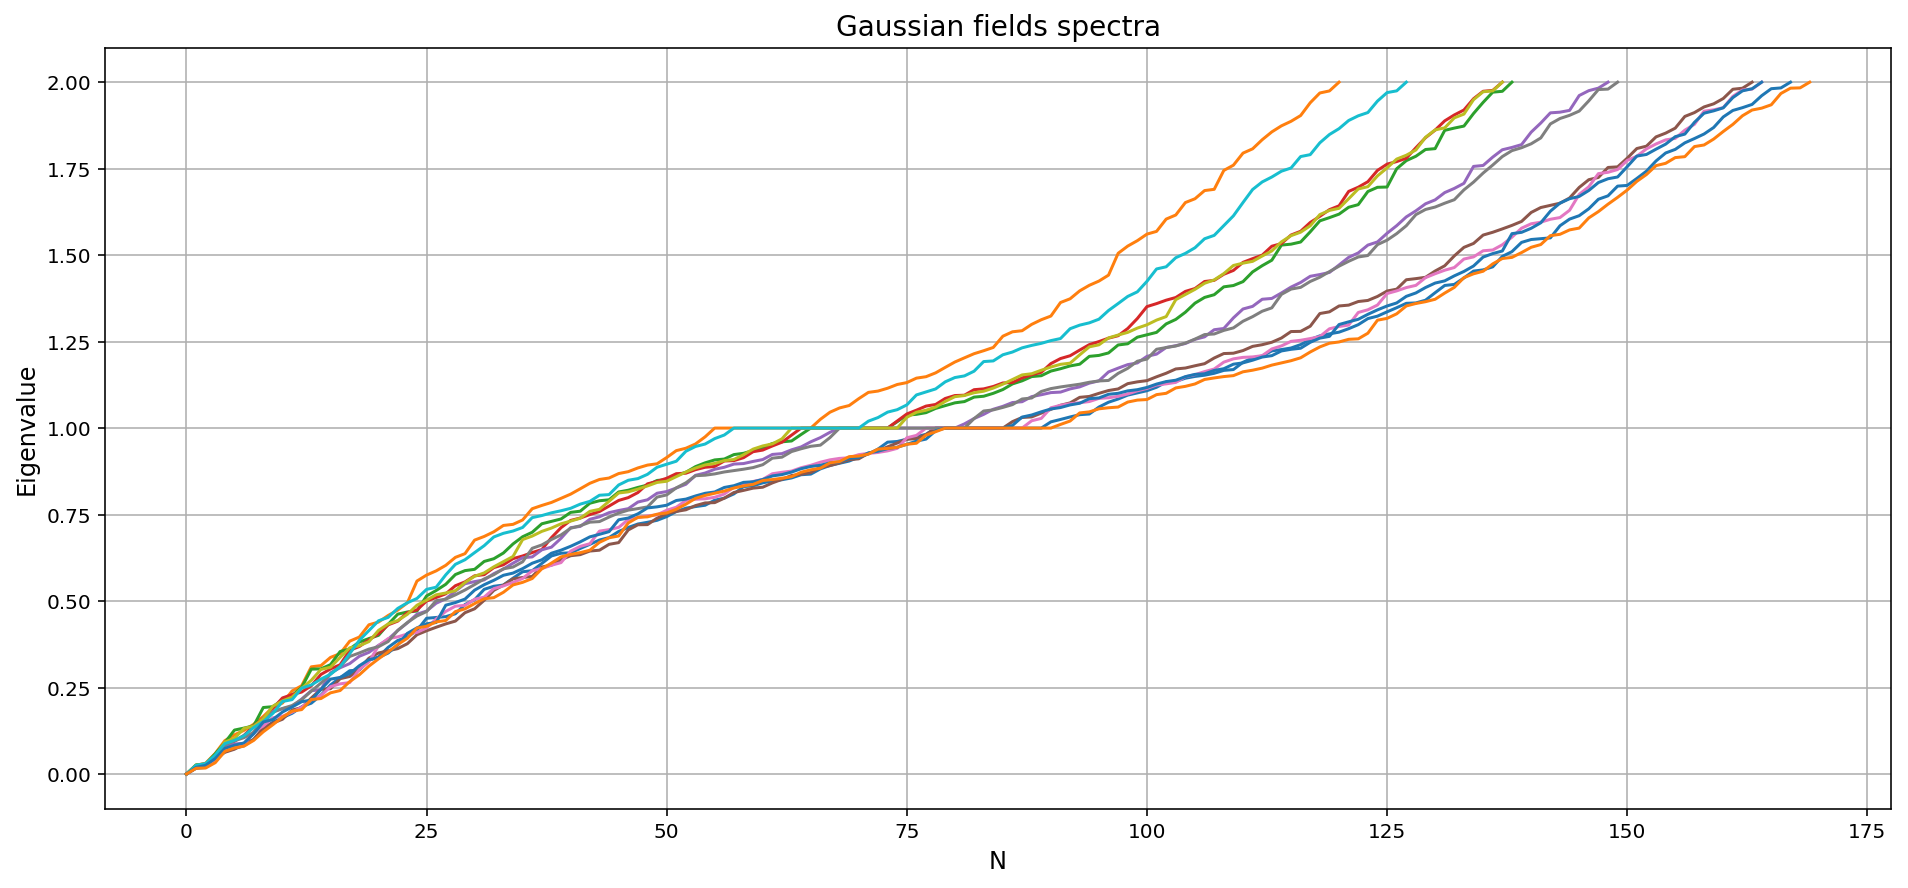

In [4]:
plt.figure(figsize=(16, 7))
ax = plt.subplot(111)
plt.title('Gaussian fields spectra', fontsize=14)
ax.grid(True)
ax.set_xlabel('N', fontsize=12)
ax.set_ylabel('Eigenvalue', fontsize=12)
for sp in spectra:
    ax.plot(sp)
plt.savefig('gauss_fields_spectra.png', dpi=200)
plt.show()

## Логнормальные случайные поля

In [5]:
lognorm_spectra = cpt_spectra([
    'data/lognorm_fields/lnf1.txt',
    'data/lognorm_fields/lnf2.txt',
    'data/lognorm_fields/lnf3.txt',
    'data/lognorm_fields/lnf4.txt',
    'data/lognorm_fields/lnf5.txt',
], beta=9)
for i, sp in enumerate(lognorm_spectra):
    np.savetxt('lnf%d_spectra.txt' % i, sp)

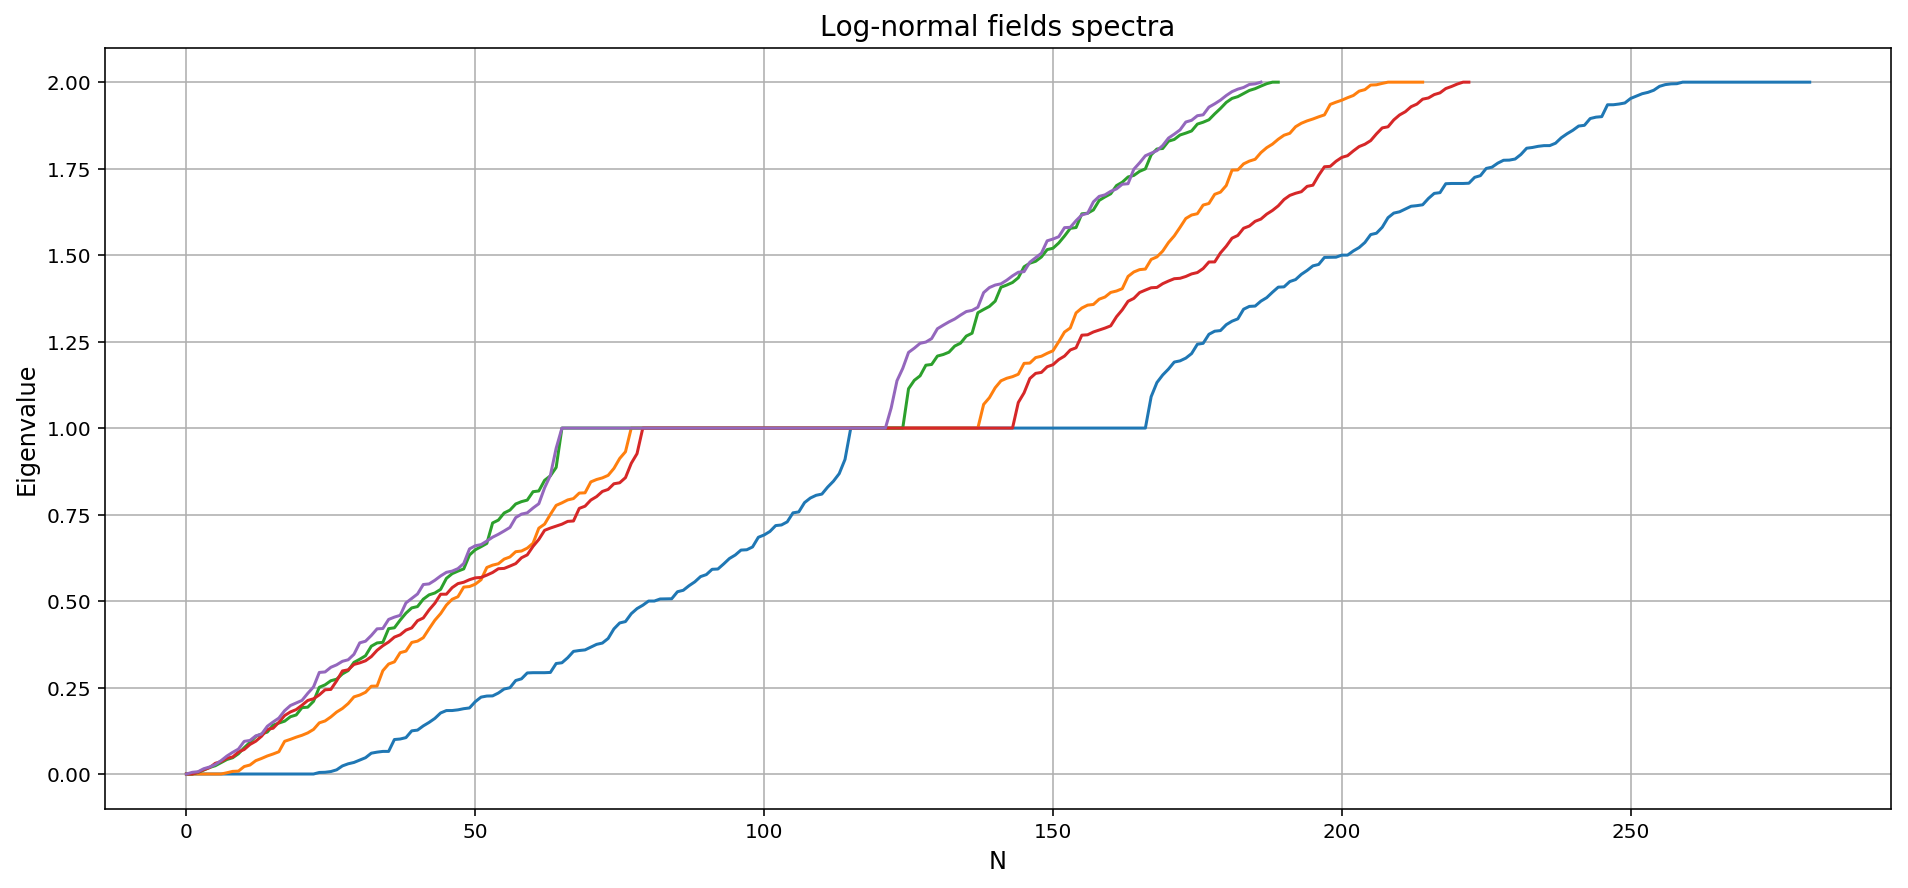

In [6]:
plt.figure(figsize=(16, 7))
ax = plt.subplot(111)
plt.title('Log-normal fields spectra', fontsize=14)
ax.grid(True)
ax.set_xlabel('N', fontsize=12)
ax.set_ylabel('Eigenvalue', fontsize=12)
for sp in lognorm_spectra:
    ax.plot(sp)
plt.savefig('lognormal_fields_spectra.png', dpi=200)
plt.show()

## Поля из симуляции зарождающейся вселенной (каждое поле - срез)

In [7]:
files = []
for i in range(1, 13):
    files.append('data/universe/rho1_12/rho%d.txt' % i)
spectra = cpt_spectra(files, beta=7)

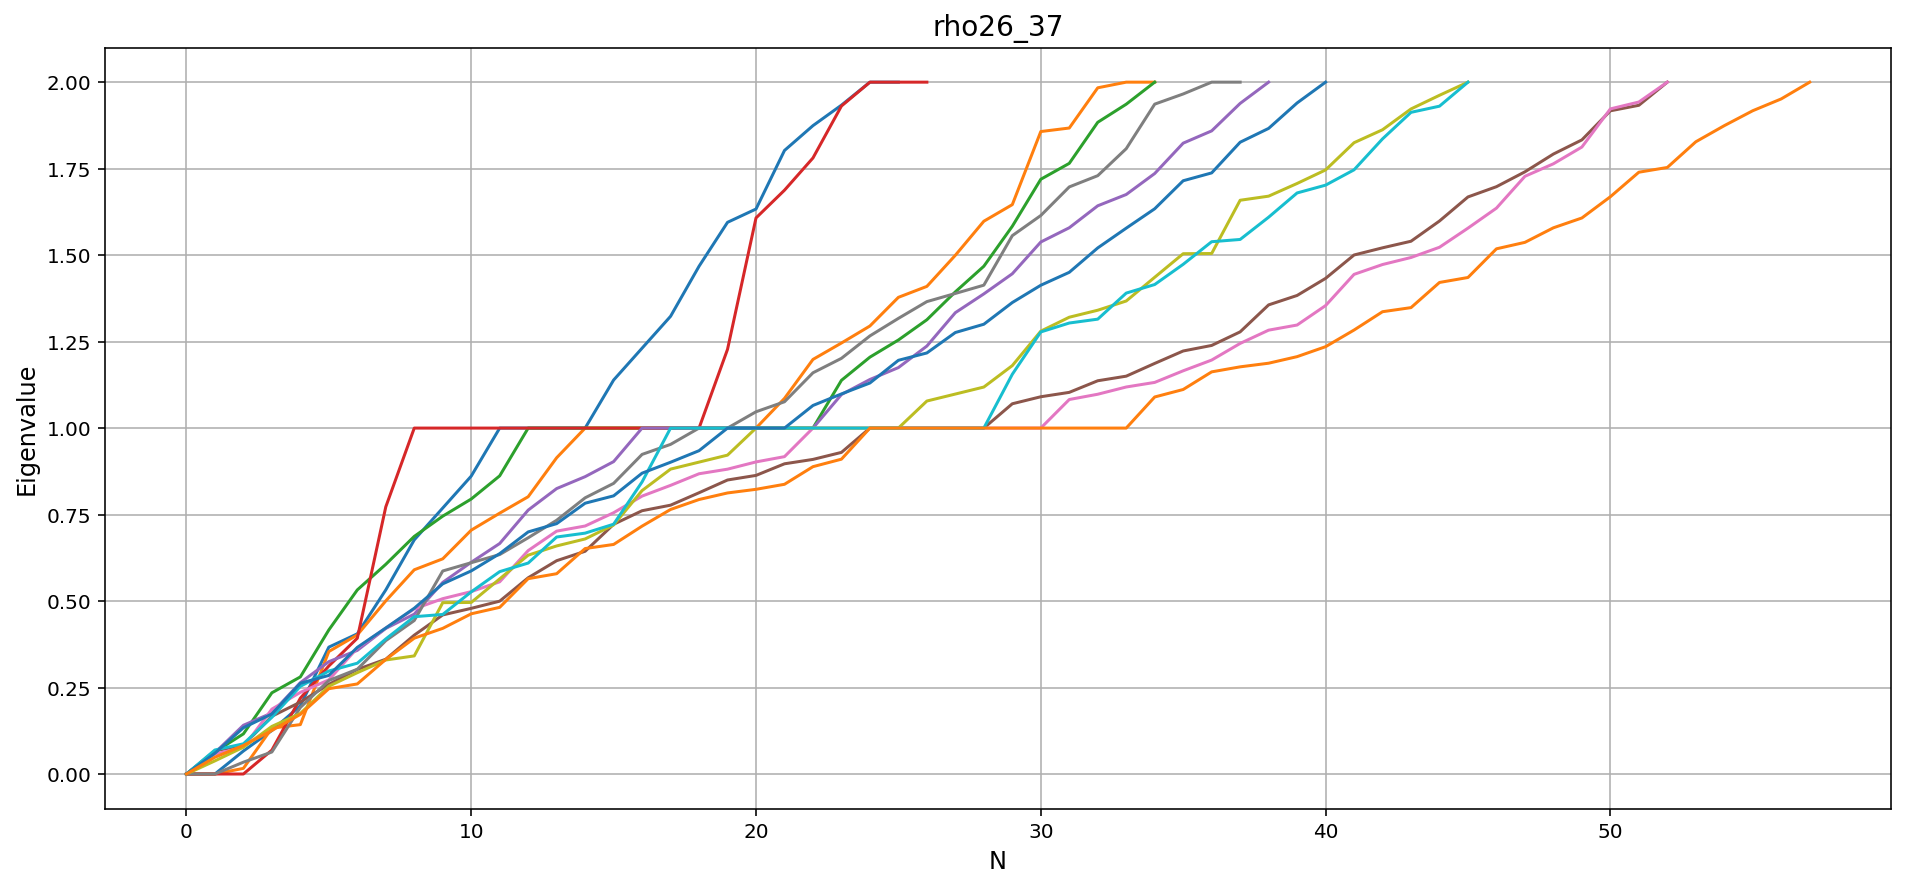

In [8]:
files = []
for i in range(26, 38):
    files.append('data/universe/rho26_37/rho%d.txt' % i)
spectra = cpt_spectra(files, level=50)
plt.figure(figsize=(16, 7))
ax = plt.subplot(111)
plt.title('rho26_37', fontsize=14)
ax.grid(True)
ax.set_xlabel('N', fontsize=12)
ax.set_ylabel('Eigenvalue', fontsize=12)
for i, sp in enumerate(spectra):
    ax.plot(sp)
plt.savefig('univ__rho26_38__level50.png', dpi=200)
plt.show()

# Критическую сеть для симуляции зарождающейся вселенной

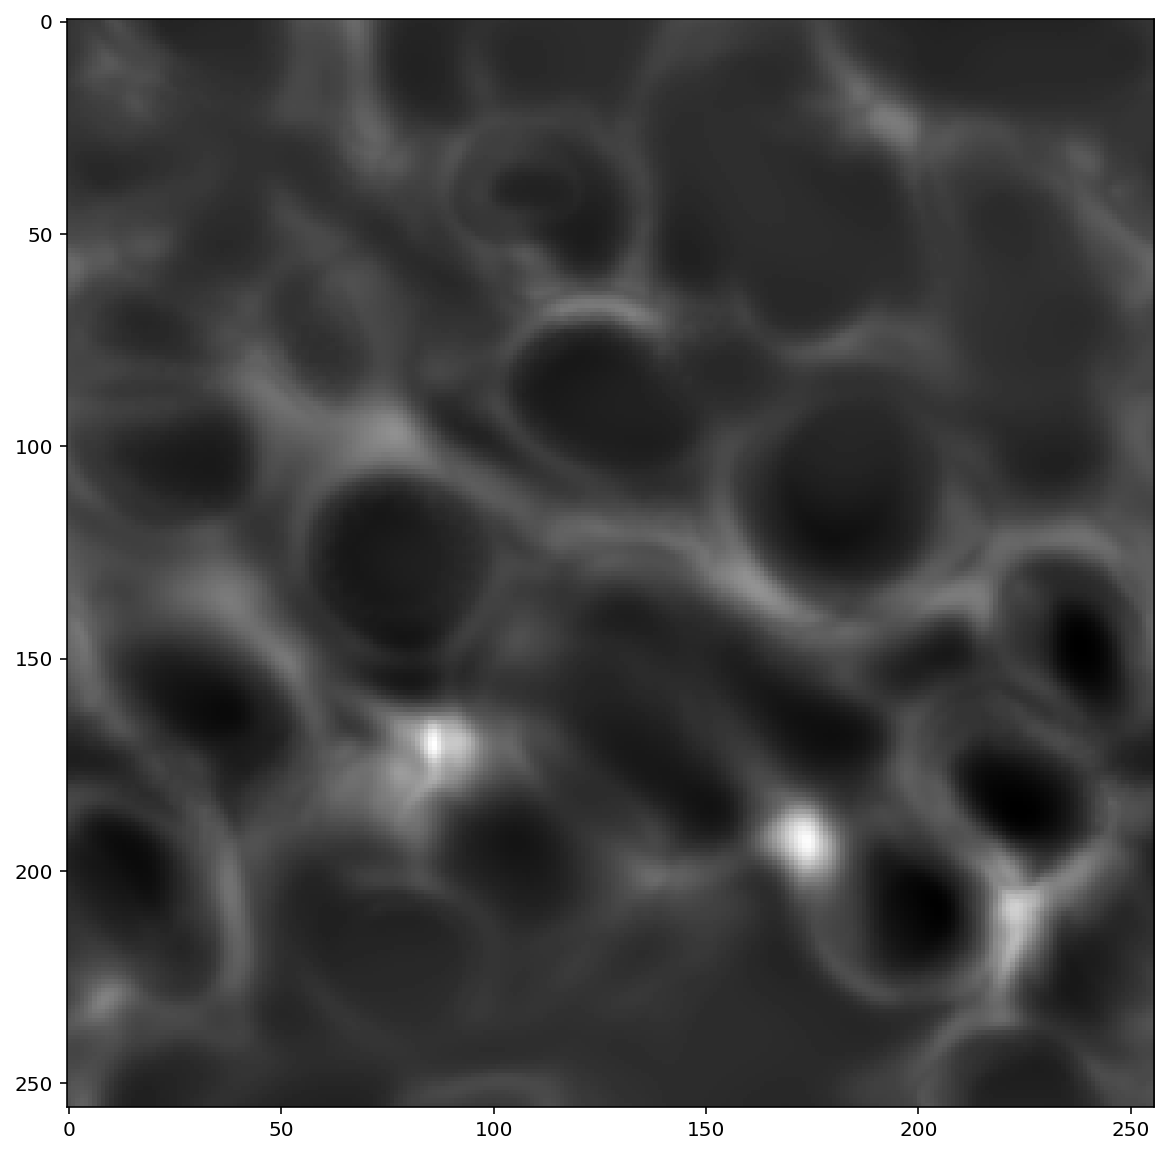

In [9]:
filepath = 'data/universe/rho26_37/rho35.txt'
img = np.loadtxt(filepath)
img = utl.scale_img(img)

plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.show()

In [10]:
log, components, beta_scales, betas = cnet.cpt_stable_log_ndarr(img, ss_sigma=1.6)
print(list(zip(beta_scales, betas)))

[(6, 2), (12, 3), (15, 3), (17, 2), (23, 5), (28, 3), (30, 2), (35, 5), (37, 2), (48, 11), (61, 13), (78, 17), (99, 21)]


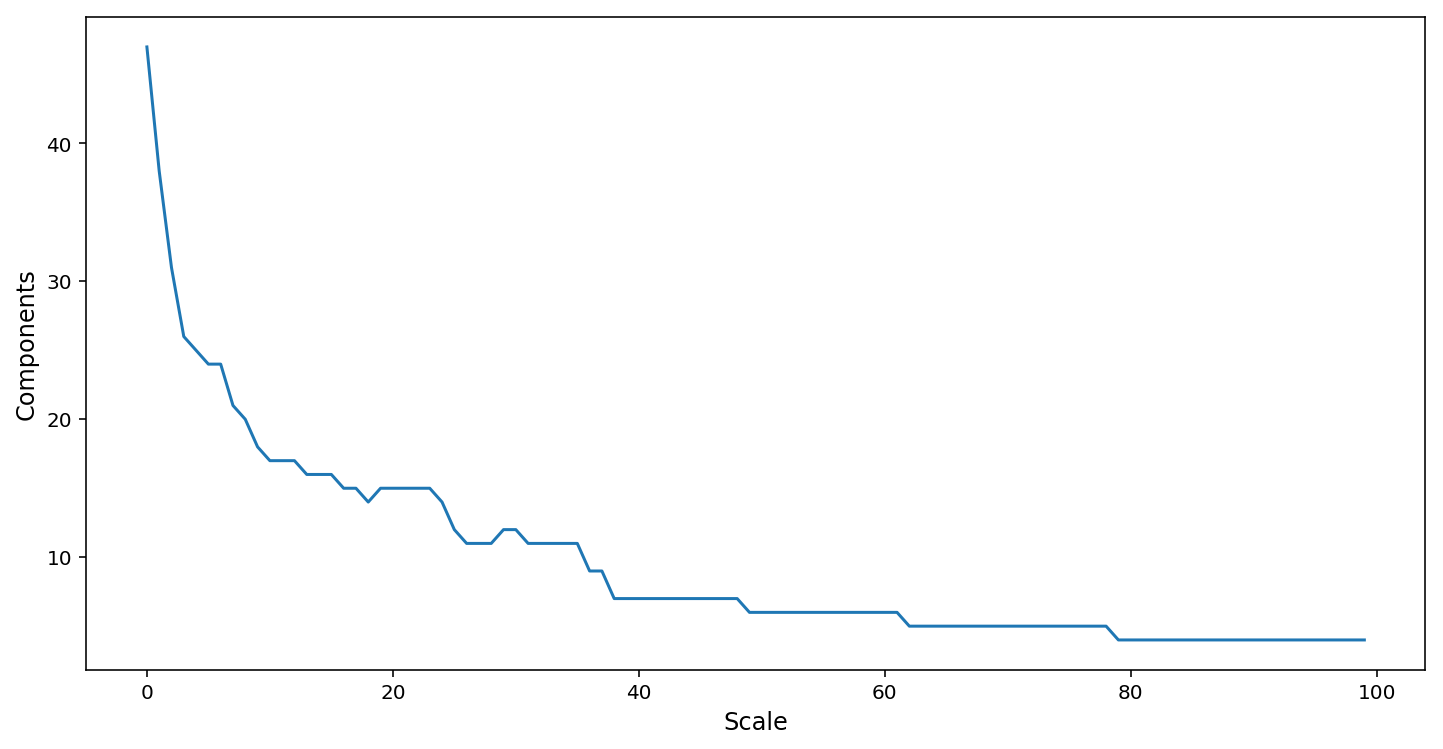

In [11]:
cnet.plot_components(components)
plt.show()

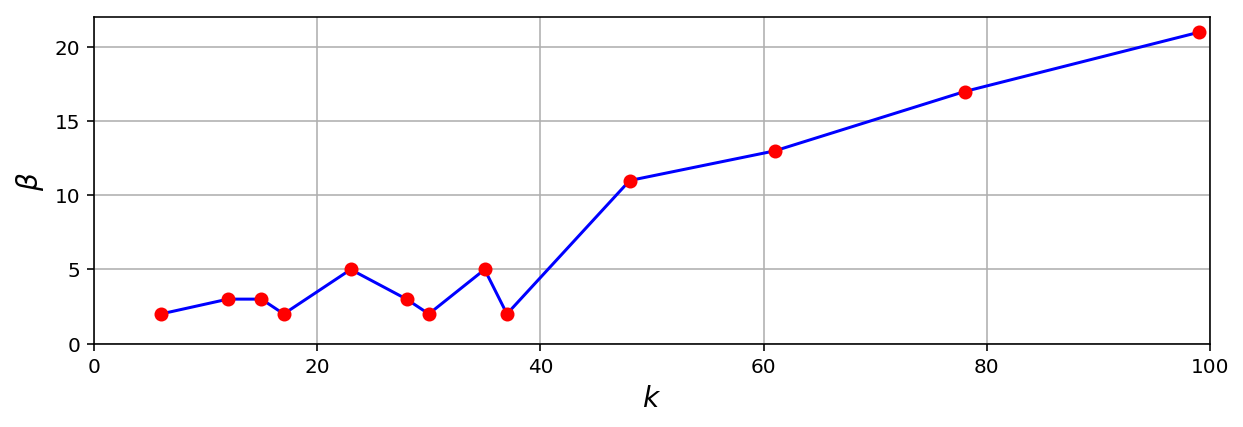

In [12]:
cnet.plot_betas(beta_scales, betas)
plt.show()

In [13]:
s_idx = cnet.select_level(5, betas)
s = beta_scales[s_idx]
print('Selected: (scale, beta) = (%d, %d)' % (s, betas[s_idx]))
lap = log[50]
minima, maxima = cnet.cpt_keypoints(lap, replace_clusters=True)
print('Minima: %d, maxima: %d' % (len(minima), len(maxima)))

Selected: (scale, beta) = (23, 5)
Minima: 17, maxima: 31


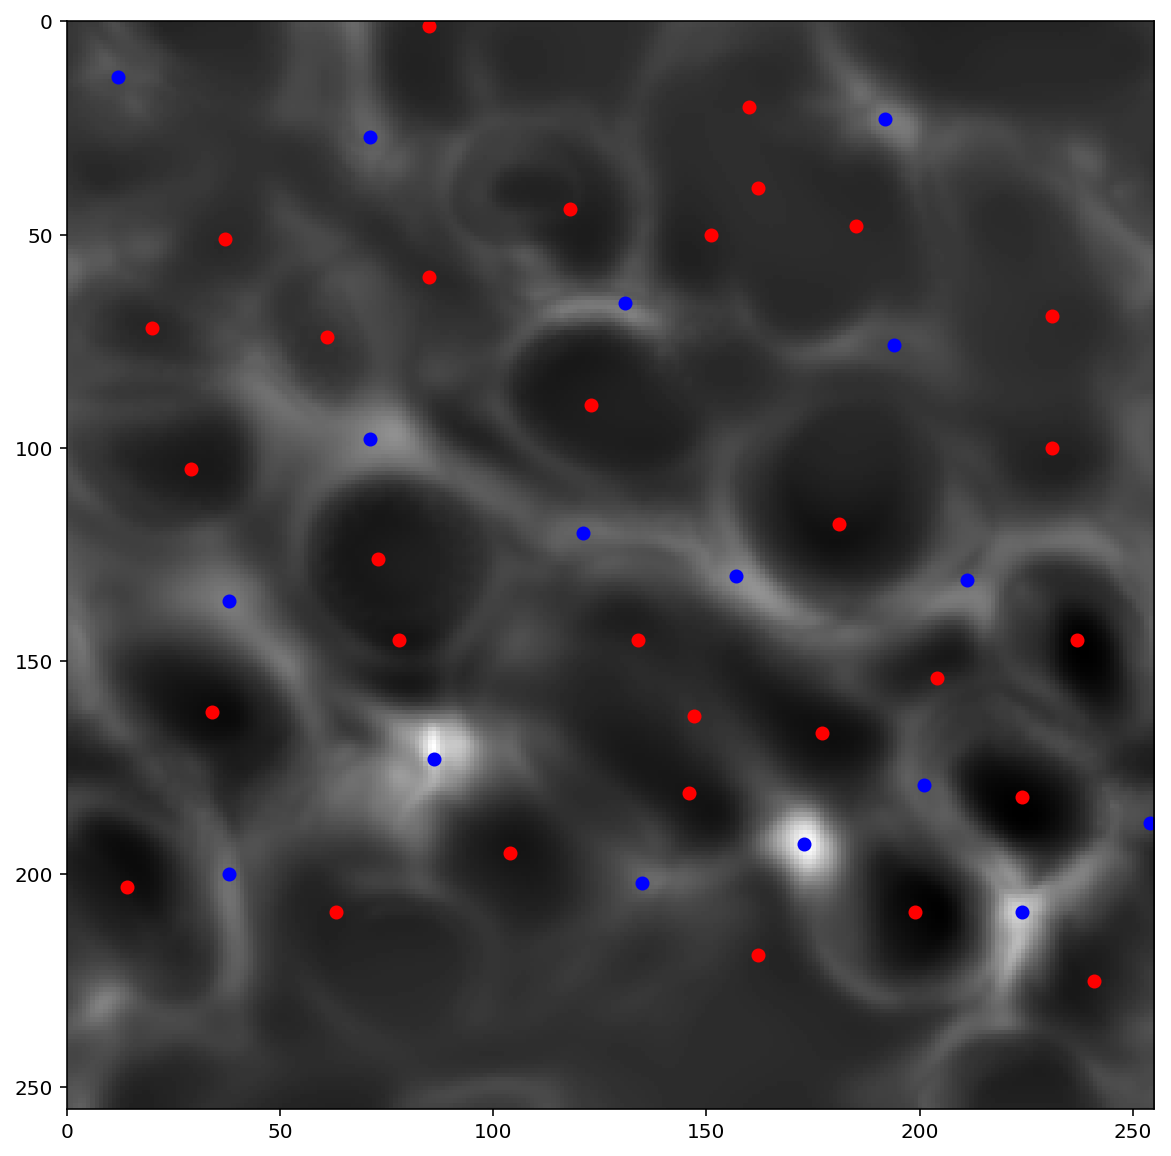

In [14]:
cnet.plot_keypoints(img, minima, maxima)
plt.show()

In [15]:
edges = cnet.cpt_criticalnet(lap, minima, maxima)
print('Edges: %d' % len(edges))

Edges: 74


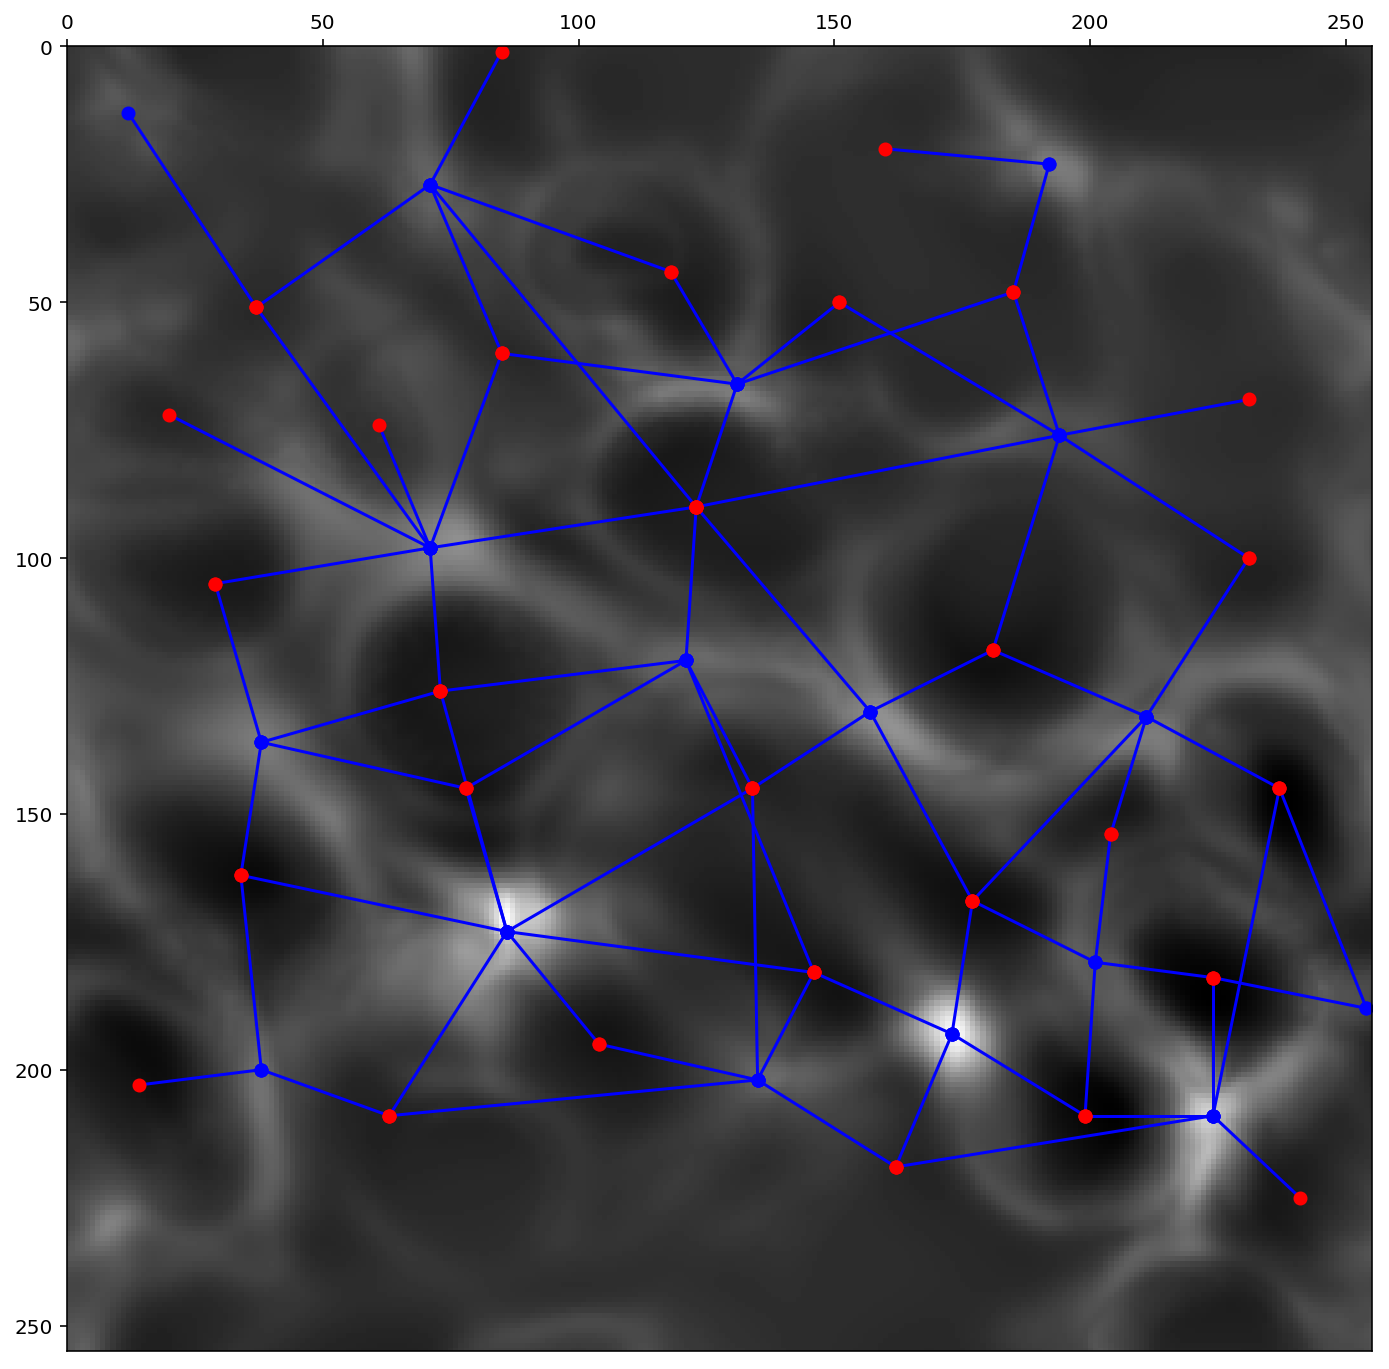

In [16]:
cnet.plot_criticalnet(img, edges)
plt.show()